In [ ]:
import pandas as pd

data = pd.read_csv('/Users/siddharthtripathi/Downloads/Machine Learning using Python/Unsupervised/Files/student_success_dataset.csv')
print(data.head())

print('DataSet shape:')
print(f"Rows :{data.shape[0]}, Columns :{data.shape[1]}")

print("DataSet INFO:")
print(data.info())

print("Summary Statistics:")
print(data.describe(include='all'))

print("Missing Values in each column:")
print(data.isnull().sum())

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/siddharthtripathi/Downloads/Machine Learning using Python/Unsupervised/Files/student_success_dataset.csv')

print("MISSING VALUES:")
print(df.isnull().sum())


le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df['Passed'])

print ("ENCODED DATA")
print(df.head())

print("DATA TYPES")
print(df.dtypes)


MISSING VALUES:


NameError: name 'data' is not defined

SCALED DATA
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



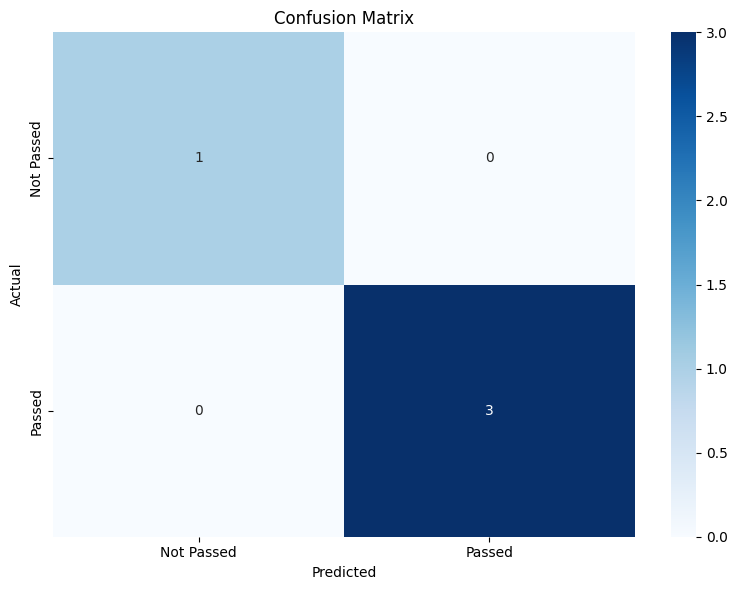

Predict your result here:
Error in input: could not convert string to float: ''


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/siddharthtripathi/Downloads/Machine Learning using Python/Unsupervised/Files/student_success_dataset.csv')

le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df['Passed'])

features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features]=scaler.fit_transform(df[features])
print("SCALED DATA")

X = df_scaled[features]
Y = df_scaled['Passed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("CLASSIFICATION REPORT")
print(classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure (figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Passed', 'Passed'], yticklabels=['Not Passed', 'Passed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("Predict your result here:")
try:
    study_hours = float(input("Enter Study Hours: "))
    attendance = float(input("Enter Attendance: "))
    past_score = float(input("Enter Past Score: "))
    sleep_hours = float(input("Enter Sleep Hours: "))

    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance': attendance,
        'PastScore': past_score,
        'SleepHours': sleep_hours
    }])
    user_input_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)
    result = "Passed" if prediction[0] == 1 else "Not Passed"
    print(f"The student is predicted to: {result}")
except Exception as e:
    print(f"Error in input: {e}")


